<a href="https://colab.research.google.com/github/ZsomBEAST/Deep-Learning-kishazik/blob/main/FONP0O_IVhw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pip #use the enwest pip

     |████████████████████████████████| 1.5MB 9.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
pip install openimages #download google open image libraries

     |████████████████████████████████| 129 kB 17.6 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 6.7 MB 11.8 MB/s 
     |████████████████████████████████| 69 kB 9.6 MB/s 
     |████████████████████████████████| 291 kB 63.6 MB/s 
     |████████████████████████████████| 137.3 MB 84 kB/s 
  Created wheel for ImageHash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=79a60046f7c405696868b2a58e5a9fcbb0b7976b823f202375fe5e5a2b27b78f
  Stored in directory: /root/.cache/pip/wheels/43/f6/25/a58e553441acfc5ad7782c545147759c94d0d95ea1c1edd4bf
Successfully built ImageHash
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

botocore 1.19.15 requires urllib3<1.26,>=1.25.4; python_version 

In [3]:
from openimages.download import download_dataset #lib fro download the  dataset
download_dataset(dest_dir="google_images",class_labels=["Bird", "Flower","Boat",],annotation_format="pascal",csv_dir="google_images/labels",limit=600) #the 3: category bird-flower-boat

2020-11-11  20:16:25 INFO NumExpr defaulting to 2 threads.
2020-11-11  20:16:28 INFO Downloading 600 train images for class 'bird'
100%|██████████| 600/600 [00:06<00:00, 91.82it/s]
2020-11-11  20:16:34 INFO Creating 600 train annotations (pascal) for class 'bird'
100%|██████████| 600/600 [00:00<00:00, 2296.17it/s]
2020-11-11  20:16:36 INFO Downloading 600 train images for class 'flower'
100%|██████████| 600/600 [00:07<00:00, 76.23it/s]
2020-11-11  20:16:44 INFO Creating 600 train annotations (pascal) for class 'flower'
100%|██████████| 600/600 [00:00<00:00, 2368.38it/s]
2020-11-11  20:16:47 INFO Downloading 600 train images for class 'boat'
100%|██████████| 600/600 [00:07<00:00, 83.49it/s]
2020-11-11  20:16:55 INFO Creating 600 train annotations (pascal) for class 'boat'
100%|██████████| 600/600 [00:00<00:00, 2358.45it/s]


{'bird': {'annotations_dir': 'google_images/bird/pascal',
  'images_dir': 'google_images/bird/images'},
 'boat': {'annotations_dir': 'google_images/boat/pascal',
  'images_dir': 'google_images/boat/images'},
 'flower': {'annotations_dir': 'google_images/flower/pascal',
  'images_dir': 'google_images/flower/images'}}

In [4]:
import os
import numpy as np
import shutil #lib to copying files
from tensorflow.keras.preprocessing.image import img_to_array, load_img #functions to prepare the input data

base_dir="google_images" #load the data from google imgage
bird_dir = os.path.join(os.path.join(base_dir, "bird"),"images")
flower_dir = os.path.join(os.path.join(base_dir, "flower"),"images") #paths to reach the data
boat_dir = os.path.join(os.path.join(base_dir, "boat"),"images")

img_height=299 #input size of the  inception V3
img_width=299


In [5]:
#seprate the images to train - valid - test dictionaries 
base_dir = 'sorted_inputs' #make another dict for the sorted and renamed files

train_dir = os.path.join(base_dir, 'train') #making dict paths, we will create folder system with theese strings to make easier to handle the inputs with image data generator
validation_dir = os.path.join(base_dir, 'validation')
test_dir=os.path.join(base_dir,'test')

train_bird_dir = os.path.join(train_dir, 'bird')
train_flower_dir = os.path.join(train_dir, 'flower')
train_boat_dir = os.path.join(train_dir, 'boat')

validation_bird_dir = os.path.join(validation_dir, 'bird')
validation_flower_dir = os.path.join(validation_dir, 'flower')
validation_boat_dir = os.path.join(validation_dir, 'boat')


bit=0

In [6]:
#let's make directions to separate the images train - validatin - test

if(bit):
  shutil.rmtree(base_dir) #if we already made the dictionarys it will give us error, delete it before we create it again

os.makedirs(train_bird_dir) #lets make the dict.-s that we have already talked about
os.makedirs(train_flower_dir) #in train and validation there 'll be separated folders for th classes ->easy to ahndle with ImageDataGenerator
os.makedirs(train_boat_dir)

os.makedirs(validation_bird_dir)
os.makedirs(validation_flower_dir)
os.makedirs(validation_boat_dir)

os.makedirs(test_dir) #test is diffrent, we will prepare the train dataset with in the original, classic way

boat_fnames = os.listdir(boat_dir) #getting the names of the images
bird_fnames = os.listdir(bird_dir)
flower_fnames = os.listdir(flower_dir)

#train
for i in range(0,400):            #3*400 picture
  src=os.path.join(bird_dir,bird_fnames[i]) #we copy the file from here
  dst=train_bird_dir #we copy the file here
  shutil.copy(src, dst)   #copying the first 3*400 img to the train folder
  os.rename(os.path.join(train_bird_dir,bird_fnames[i]),os.path.join(train_bird_dir,('bird.'+str(i)+'.jpg'))) #rename the images (easier to handle) for example: bird.001.jpg

  src=os.path.join(flower_dir,flower_fnames[i])
  dst=train_flower_dir
  shutil.copy(src, dst)
  os.rename(os.path.join(train_flower_dir,flower_fnames[i]),os.path.join(train_flower_dir,('flower.'+str(i)+'.jpg')))

  src=os.path.join(boat_dir,boat_fnames[i])
  dst=train_boat_dir
  shutil.copy(src, dst)
  os.rename(os.path.join(train_boat_dir,boat_fnames[i]),os.path.join(train_boat_dir,('boat.'+str(i)+'.jpg')))

#valdiation 
for i in range(400,500):          # the next3*100 picure
  src=os.path.join(bird_dir,bird_fnames[i])
  dst=validation_bird_dir
  shutil.copy(src, dst) #copying the next 3*100 img to the validation folder
  os.rename(os.path.join(validation_bird_dir,bird_fnames[i]),os.path.join(validation_bird_dir,('bird.'+str(i)+'.jpg')))

  src=os.path.join(flower_dir,flower_fnames[i])
  dst=validation_flower_dir
  shutil.copy(src, dst)
  os.rename(os.path.join(validation_flower_dir,flower_fnames[i]),os.path.join(validation_flower_dir,('flower.'+str(i)+'.jpg')))

  src=os.path.join(boat_dir,boat_fnames[i])
  dst=validation_boat_dir
  shutil.copy(src, dst)
  os.rename(os.path.join(validation_boat_dir,boat_fnames[i]),os.path.join(validation_boat_dir,('boat.'+str(i)+'.jpg')))

#test
x_test=np.zeros([300,img_height,img_width,3]) #train input shape -> inceptionV3's input x 300 (we got 300 diffrent input fo test)
y_test=np.zeros([300,3]) #1 forward propagation makes an array with 3 elements (onehot coding), we got 300 test images so the label is 300*3

for i in range(500,600):       #3*100 picture
  src=os.path.join(bird_dir,bird_fnames[i])
  dst=test_dir
  shutil.copy(src, dst) #copying the next 3*100 img to the test folder
  os.rename(os.path.join(test_dir,bird_fnames[i]),os.path.join(test_dir,('bird.'+str(i)+'.jpg')))
  y_test[i-500,0],y_test[i-500,1],y_test[i-500,2]=1,0,0 # onehotcooding
  img = load_img(os.path.join(test_dir,('bird.'+str(i)+'.jpg')), target_size=(img_height, img_width)) #reshape the images to 299x299(x3 RGB)
  x_test[i-500,:,:,:]= img_to_array(img) #save the images into the big test input vector as a numpy array

  src=os.path.join(flower_dir,flower_fnames[i])
  dst=test_dir
  shutil.copy(src, dst)
  os.rename(os.path.join(test_dir,flower_fnames[i]),os.path.join(test_dir,('flower.'+str(i)+'.jpg')))
  y_test[i-400,0],y_test[i-400,1],y_test[i-400,2]=0,0,1
  img = load_img(os.path.join(test_dir,('flower.'+str(i)+'.jpg')), target_size=(img_height, img_width))
  x_test[i-400,:,:,:]= img_to_array(img)

  src=os.path.join(boat_dir,boat_fnames[i])
  dst=test_dir
  shutil.copy(src, dst)
  os.rename(os.path.join(test_dir,boat_fnames[i]),os.path.join(test_dir,('boat.'+str(i)+'.jpg')))
  y_test[i-300,0],y_test[i-300,1],y_test[i-300,2]=0,1,0
  img = load_img(os.path.join(test_dir,('boat.'+str(i)+'.jpg')), target_size=(img_height, img_width))
  x_test[i-300,:,:,:]= img_to_array(img)

bit=1 #if we have already ran this delete the base_dir because othervise we got error

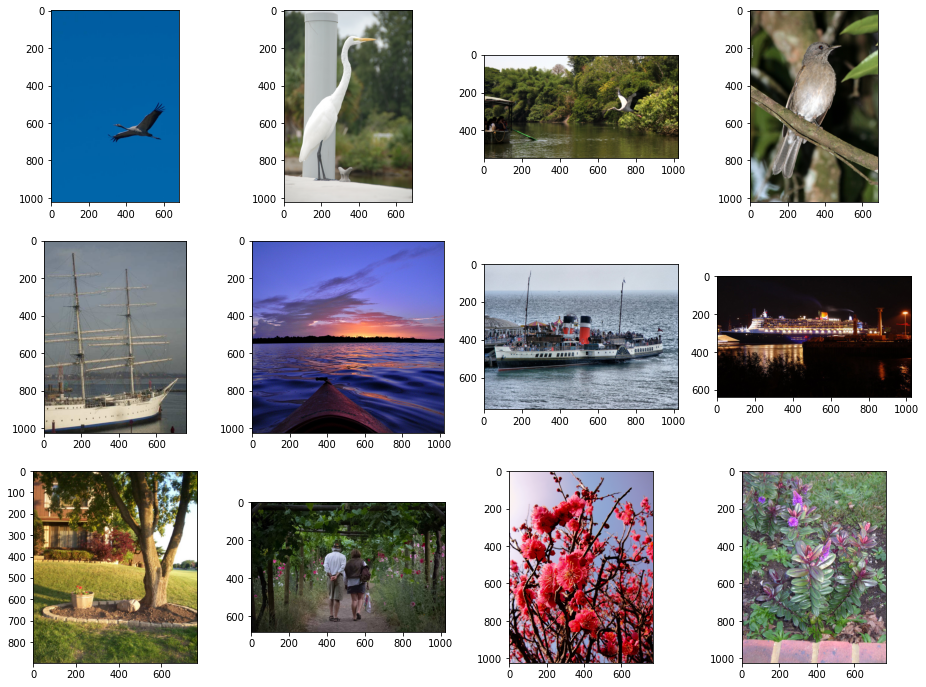

In [7]:
#plot some img from  the data, so we can check we have done everything well so far
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rows = 3 #3 class->3 row
cols = 4 #4 picture from each class

fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

next_bird_pix = [os.path.join(bird_dir, fname) for fname in bird_fnames[0:cols]]
next_boat_pix = [os.path.join(boat_dir, fname) for fname in boat_fnames[2:cols+2]]
next_flower_pix = [os.path.join(flower_dir, fname) for fname in flower_fnames[0:cols]]

for i, img_path in enumerate(next_bird_pix+next_boat_pix+next_flower_pix):
    sp = plt.subplot(rows, cols, i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # we will load the input from the disk, in minibatches
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions # the AI we teach further
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import SGD #optimiser method
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout #lib to go from cnn->mlp
from tensorflow.keras import backend as K
from keras.callbacks import ModelCheckpoint #we will save the best model


In [9]:
base_model = InceptionV3(weights='imagenet', include_top=False) #all the CNN layers come from the inceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x) #avaraging and flatten
x = Dense(1024, activation='relu')(x) #we use 2 mpl layer with 1024 - 1024 neurons
x = Dense(1024, activation='relu')(x) #activation in hiden MLP layers is relu
predictions = Dense(3, activation='softmax')(x) #we use soft max and corssentropy
model = Model(inputs=base_model.input, outputs=predictions) #creating the merged model

87916544/87910968 [==============================] - 1s 0us/step


In [10]:

for layer in base_model.layers:
    layer.trainable = False #first we freeze all the CNN weights (the kernels), we just teach the MLP part
model.compile(optimizer='adam', metrics=['accuracy'],loss="categorical_crossentropy")  #optimizer is adam, we are watching the accuracy and the loss is caluculated with categorical crossentropy

In [11]:
train_datagen = ImageDataGenerator(rotation_range=40, #we enrich our train data
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) # the validation is just rescaled 0-255 -> 0-1

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical') #generating the train input from the disk we use 20 img in a batch
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')  #generating the validation input from the disk, it automatcaly makes the labels of the expectations from the name of the dict

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [12]:
checkpointer1=ModelCheckpoint(filepath='weights1.h5',save_best_only=True,verbose=1) #We save the best model with checkpointer
callbacks_list=[checkpointer1]
model.fit_generator(train_generator,steps_per_epoch=60,validation_data=validation_generator,validation_steps=10,epochs=3,callbacks=callbacks_list) #train the network

2020-11-11  20:17:16 WARNING From <ipython-input-12-f49a64a8fa85>:3: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/3
60/60 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.8358
Epoch 00001: val_loss improved from inf to 0.18239, saving model to weights1.h5
60/60 [==============================] - 309s 5s/step - loss: 0.5104 - accuracy: 0.8358 - val_loss: 0.1824 - val_accuracy: 0.9250
Epoch 2/3
60/60 [==============================] - ETA: 0s - loss: 0.2362 - accuracy: 0.9167
Epoch 00002: val_loss did not improve from 0.18239
60/60 [==============================] - 300s 5s/step - loss: 0.2362 - accuracy: 0.9167 - val_loss: 0.2943 - val_accuracy: 0.9050
Epoch 3/3
60/60 [==============================] - ETA: 0s - loss: 0.2333 - accuracy: 0.9208
Epoch 00003: val_loss improved from 0.18239 to 0.12957, saving model to weights1.h5
60/60 [==============================] - 306s 5s/step - loss: 0.2333 - accuracy: 0.9208 - val_loss: 0.1296 - val_accuracy: 0.9550


In [13]:
from keras.models import load_model
model = load_model('weights1.h5') #we load the best model from the previos learning, we will go on with that
for layer in model.layers[:172]: #the layers's weight above the 172.layer are trainable now
       layer.trainable = False
for layer in model.layers[172:]:
       layer.trainable = True
model.compile(optimizer=SGD(lr=1e-4, momentum=0.9), metrics=['accuracy'], loss='categorical_crossentropy') #same paramaters as before, but now we use SGD instead of adams for optimizing

checkpointer2=ModelCheckpoint(filepath='weights2.h5', save_best_only=True, verbose=1) #we save the best model too from this second learning session into another file

In [14]:
calbbacks_list=[checkpointer2]
model.fit_generator(train_generator,steps_per_epoch=60,validation_data=validation_generator,validation_steps=10,epochs=3,callbacks=callbacks_list) #now we also train some CNN layer

Epoch 1/3
60/60 [==============================] - ETA: 0s - loss: 0.3178 - accuracy: 0.8792
Epoch 00001: val_loss did not improve from 0.12957
60/60 [==============================] - 514s 9s/step - loss: 0.3178 - accuracy: 0.8792 - val_loss: 0.1373 - val_accuracy: 0.9450
Epoch 2/3
60/60 [==============================] - ETA: 0s - loss: 0.2290 - accuracy: 0.9142
Epoch 00002: val_loss did not improve from 0.12957
60/60 [==============================] - 510s 9s/step - loss: 0.2290 - accuracy: 0.9142 - val_loss: 0.1392 - val_accuracy: 0.9450
Epoch 3/3
60/60 [==============================] - ETA: 0s - loss: 0.2175 - accuracy: 0.9258
Epoch 00003: val_loss did not improve from 0.12957
60/60 [==============================] - 504s 8s/step - loss: 0.2175 - accuracy: 0.9258 - val_loss: 0.1918 - val_accuracy: 0.9300


In [15]:
model1 = load_model('weights1.h5')
#model2 = load_model('weights2.h5') #makes error because, the file is not even created ->when the conv layers are trainable too, we didn't get better results (not even once)
model2=model #use the last model as the result of the "conv2d" learning result

Analise when just MLP layers were trainable

In [16]:
x_test_preprocessed = preprocess_input(x_test) #prepare the input data with a special function
y_pred1 = model1.predict(x_test_preprocessed) #make the prediction
y_pred1 = np.argmax(y_pred1,1) #using argmax to make confusion matrix
y_true = np.argmax(y_test,1)

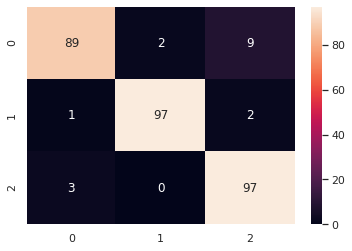

In [17]:
from sklearn.metrics import confusion_matrix
conf1=confusion_matrix(y_true, y_pred1)
import seaborn as sns; sns.set()
sns.heatmap(conf1, annot=True, fmt='d')


Analise when the upper CNN layers and the MLP layers were tarinable

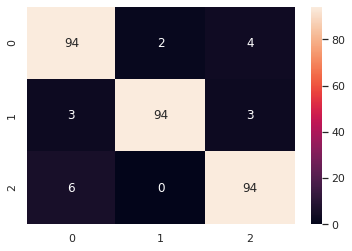

In [18]:
y_pred2 = model2.predict(x_test_preprocessed)
y_pred2 = np.argmax(y_pred2,1)
conf2=confusion_matrix(y_true, y_pred2)
sns.heatmap(conf2, annot=True, fmt='d')